In [25]:

%pip install pandas matplotlib scikit-learn
%pip install --upgrade pip



Note: you may need to restart the kernel to use updated packages.


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import numpy as np
import pandas as pd


In [27]:
# Load the dataset from your local directory
file_path = 'C:\\Users\\Anil Rathod\\Desktop\\LP III\\ML\\Pract - 6\\Mall_Customers.csv'

df = pd.read_csv(file_path)

# Check the shape and the first few rows of the dataset
print(df.shape)
print(df.head())


(200, 5)
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [28]:
df["A"] = df["Annual Income (k$)"]
df["B"] = df["Spending Score (1-100)"]

X = df[["A", "B"]]
print(X.head())


    A   B
0  15  39
1  15  81
2  16   6
3  16  77
4  17  40


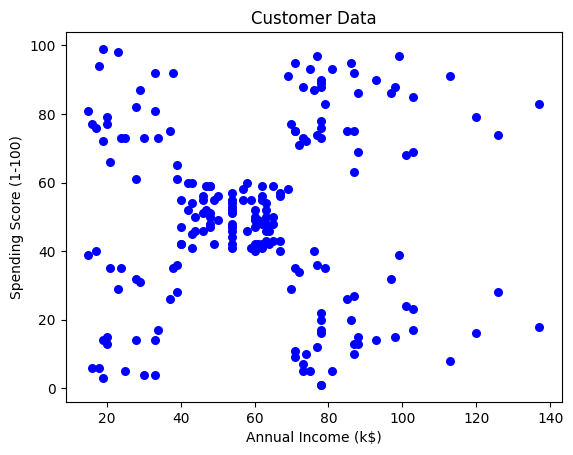

In [29]:
plt.scatter(X["A"], X["B"], s=30, c='b')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Data")
plt.show()


In [30]:
Kmean = KMeans(n_clusters=5)
Kmean.fit(X)

centers = Kmean.cluster_centers_
print("Cluster Centers:\n", centers)

clusters = Kmean.fit_predict(X)
df["label"] = clusters
print(df.head(100))


Cluster Centers:
 [[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [88.2        17.11428571]
 [25.72727273 79.36363636]
 [26.30434783 20.91304348]]
    CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)   A  \
0            1    Male   19                  15                      39  15   
1            2    Male   21                  15                      81  15   
2            3  Female   20                  16                       6  16   
3            4  Female   23                  16                      77  16   
4            5  Female   31                  17                      40  17   
..         ...     ...  ...                 ...                     ...  ..   
95          96    Male   24                  60                      52  60   
96          97  Female   47                  60                      47  60   
97          98  Female   27                  60                      50  60   
98          99    Male   48                  61         

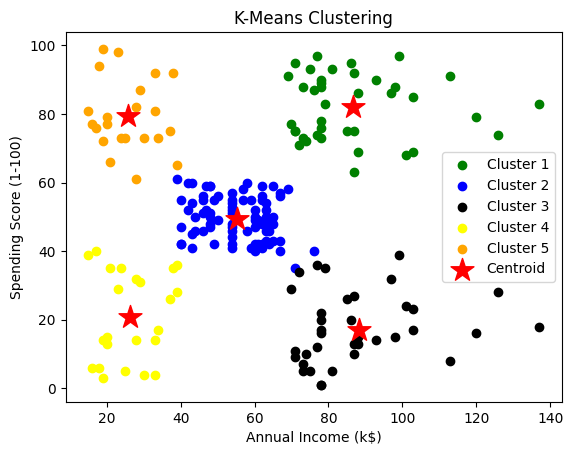

In [31]:
col = ['green', 'blue', 'black', 'yellow', 'orange']

for i in range(5):
    plt.scatter(df.A[df.label == i], df.B[df.label == i], c=col[i], label=f'Cluster {i + 1}')
    
plt.scatter(centers[:, 0], centers[:, 1], marker='*', s=300, c='red', label='Centroid')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("K-Means Clustering")
plt.legend()
plt.show()


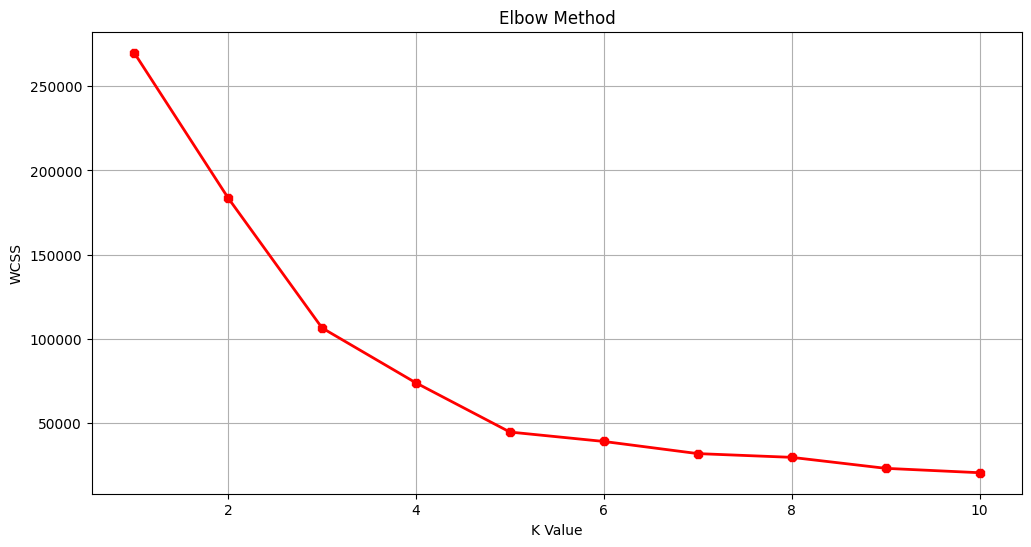

In [32]:
X1 = X.loc[:, ["A", "B"]].values
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.grid()
plt.plot(range(1, 11), wcss, linewidth=2, color="red", marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\Anil Rathod\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


Dataset shape: (2823, 25)
   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue

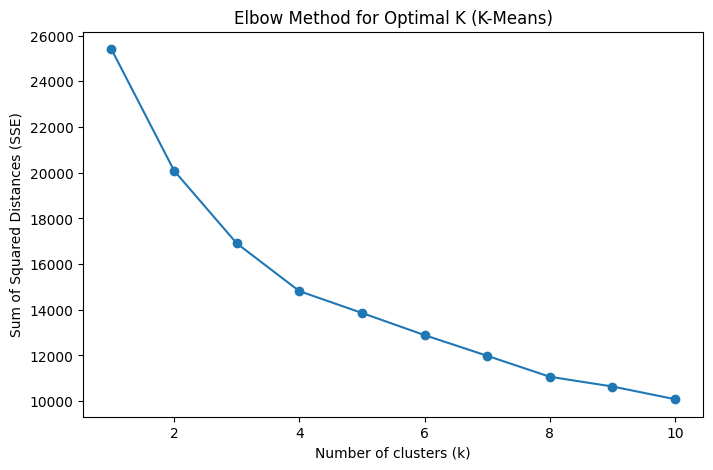

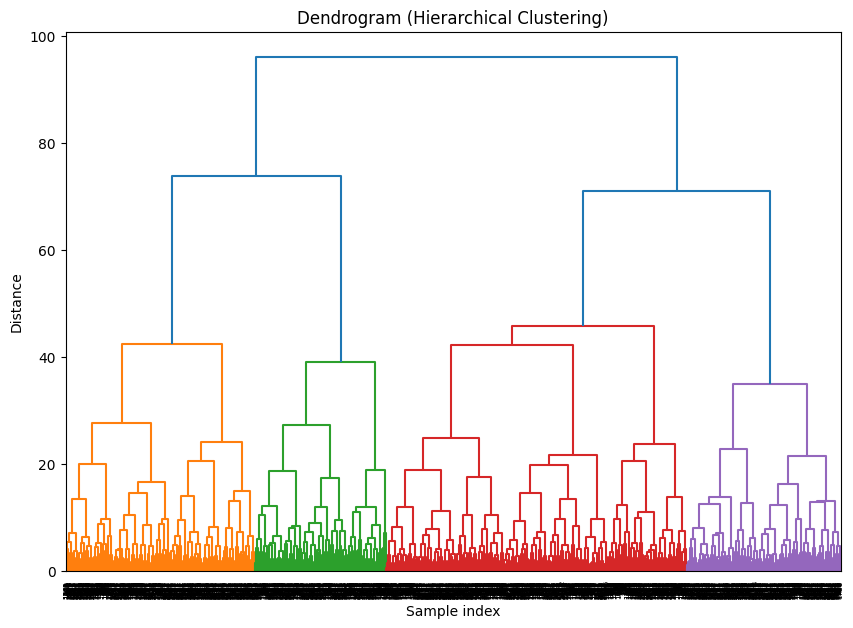

Clustered data saved to 'clustered_sales_data.csv'


In [3]:
# Install necessary packages
!pip install numpy pandas matplotlib scikit-learn scipy

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

# Load the dataset with the specified encoding
file_path = r'C:\Users\Anil Rathod\Desktop\LP 3 chits\15\sales_data_sample.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Check dataset shape and preview
print("Dataset shape:", df.shape)
print(df.head())

# Data Preprocessing: Keep only numeric columns
df = df.select_dtypes(include=[np.number]).dropna()
print("Data after removing non-numeric columns and null values:", df.shape)

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Determine the optimal number of clusters using the elbow method
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.title("Elbow Method for Optimal K (K-Means)")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Sum of Squared Distances (SSE)")
plt.show()

# Perform K-Means Clustering with optimal clusters
optimal_k = 3  # Replace this with the chosen value based on the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(df_scaled)

# Hierarchical Clustering
# Perform linkage for dendrogram
linked = linkage(df_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title("Dendrogram (Hierarchical Clustering)")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()

# Save the clustered data
df.to_csv('clustered_sales_data.csv', index=False)
print("Clustered data saved to 'clustered_sales_data.csv'")
